# Exam 2019: Introduction to programming and numerical analysis 

* **Step 1: Package import:** The first part of the code in our project is the use of libraries with essential packages of panda, numpy and glob which is essential for data structuring and especially arrays and pathnames. On top of that, we import statsmodel XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX We import the scipy package that provides various commonly used optimization algorithms. The sympy package is a Python library for symbolic computation. XXXXXXXXXXXXXXXXXXXXXXXXXX

In [6]:
import numpy as np
import sympy as sm
from sympy import symbols, Eq, solve
from IPython.display import display, Latex, Markdown
from IPython.display import Image
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate

import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt



In [22]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital).

We know that in the second period the worker maximize the utility function with respect to consumption in period 2 and that she is working meaning that $ l_{2} \, = \,\, \in \, {0,1}  $. Thus the worker solves

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

The **value function** $v_2(h_2)$ measures the household's value of having more human capital at the beginning of period 2.

In [24]:
# we define the utility function without the disutility drag  
def utility(c2,rho):
    return c2**(1-rho)/(1-rho)

def consumption_period2(h2,l2,w,b):
    if l2 ==0:
        return consumption_period2(b)
    if l2 ==1:
        return consumption_period2(h2,w)
    
def disutility(l2,gamma):
    if l2 == 0:
        return gamma*0
    
    if l2 == 1:
        return gamma*(-1)

def v2(h2,l2,rho,w,b,gamma):
    
    return utility(consumption_period2(h2, l2, w, b),rho) + disutility(l2, gamma)



In [25]:
def solve_period_2(rho,w,b,gamma):

    # a. grids
    h2_vec = np.linspace(0.1,1.5,100)
    v2_vec = np.empty(100)
    c2_vec = np.empty(100)

    # b. solve for each h2 in grid
    for i,h2 in enumerate(h2_vec):

        # i. objective
        obj = lambda c2: -v2(h2,l2,rho,w,b,gamma)

        # ii. initial value (consume half)
        x0 = 0

        # iii. optimizer
        result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[0,10])

        # iv. save
        v2_vec[i] = -result.fun
        c2_vec[i] = result.x
        
    return h2_vec,v2_vec,c2_vec

# solve
h2_vec,v2_vec,c2_vec = solve_period_2(rho,w,b,gamma)

# illustration
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(h2_vec,c2_vec)
ax.grid()
ax.set_xlabel('$m_2$')
ax.set_ylabel('$c_2$')
ax.set_title('consumption function in period 2')

ax = fig.add_subplot(1,2,2)
ax.plot(h2_vec,v2_vec)
ax.grid()
ax.set_xlabel('$m_2$')
ax.set_ylabel('$v_2$')
ax.set_title('value function in period 2')
ax.set_ylim([-40,1]);

NameError: name 'l2' is not defined

In [3]:
#Define all variables and parameters as sympy symbols
c2 = sm.symbols("c_2")
rho = sm.symbols("rho")
l2 = sm.symbols("l_2")
h2 = sm.symbols("h_2")
gamma = sm.symbols("gamma")
omega = sm.symbols("omega")


c2=(omega*h2*l2)
v2=((c2**(1-rho))/(1-rho))-gamma*l2

v2diff=sm.diff(v2,l2)

sm.solve(v2diff,l2)

l2max=sm.Eq(((((((h2*omega)/gamma)**(1/rho))/(h2*omega)))),l2)

# Latex print of physical capital per effective worker
display(Markdown('Lasse skriver her senere $ l2max= $ {}.'.format(sm.latex(l2max, mode='inline'))))





Lasse skriver her senere $ l2max= $ $\left(h_{2} \omega / \gamma\right)^{1 / \rho} / h_{2} \omega = l_{2}$.

In [4]:
(((10*2)/0.1)**(1/2))/(10*2)

0.7071067811865476

interactive(children=(FloatSlider(value=0.2, description='$\\ h2$', max=1.0, step=0.01), Output()), _dom_class…

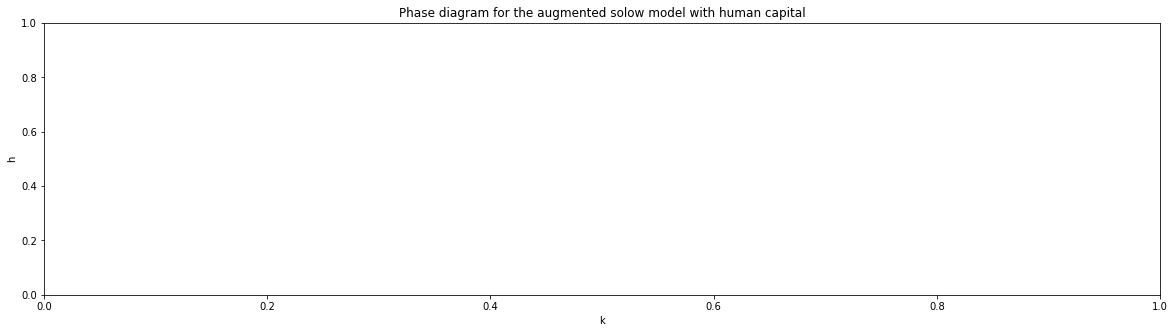

In [5]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

#Setting a vector with equal linespace
h_vec = np.linspace(0.1,1.5,100)

#Defining the phase function of capital and the known variables and parameters
def maxl2(omega, gamma, rho, h2):
    return ((((h2*omega)/gamma)**(1/rho))/(h2*omega))

#Setting an optional s_K value in the figure below
def maxl2_dia(h2):
#Figure size, labels, title and known parameters of phasek and phaseh
    fig = plt.figure(figsize=(20,5))
    plt.xlabel('k')
    plt.ylabel('h')
    maxl=maxl2(h_vec, omega, gamma, rho)
    plt.title('Phase diagram for the augmented solow model with human capital')
    #Used when you include optional variables
    ax = fig.add_subplot(1,1,1) 
    #Plots the two functions and set the axis
    ax.plot(maxl)
    ax.set_xlim([0,60])
    ax.set_ylim([0,30])
#Defining the value of h2 as a widget with a float slider bar with a max of one and default value of 0.2
widgets.interact(maxl2_dia,
    h2=widgets.FloatSlider(description="$\\ h2$", min=0, max=1, step=0.01, value=0.20),
                );

In [12]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

#Setting a vector with equal linespace
h_vec = np.linspace(0.1,1.5,100)

#Defining the phase function of capital and the known variables and parameters
def maxl2(h2):
    return ((((h2*2)/0.1)**(1/2))/(h2*2))

#Setting an optional s_K value in the figure below
def maxl2_dia(h2):
#Figure size, labels, title and known parameters of phasek and phaseh
    fig = plt.figure(figsize=(20,5))
    plt.xlabel('h2')
    plt.ylabel('l2')
    maxl2i=maxl2(h_vec)
    plt.title('Phase diagram for the augmented solow model with human capital')
    #Used when you include optional variables
    ax = fig.add_subplot(1,1,1) 
    #Plots the two functions and set the axis
    ax.plot(maxl2i)
    ax.set_xlim([0,10])
    ax.set_ylim([0,1])
#Defining the value of h2 as a widget with a float slider bar with a max of one and default value of 0.2
widgets.interact(maxl2_dia,
    h2=widgets.FloatSlider(description="$\\ h2$", min=0, max=10, step=0.01, value=5.20),
                );

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital).

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

TypeError: can't convert expression to float

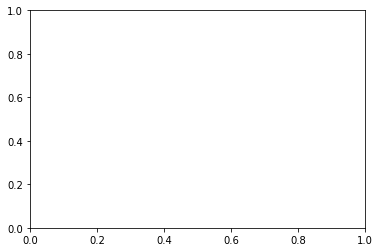

In [13]:
plt.plot((((h2*2)/0.1)**(1/2))/(h2*2))